# Importing packages and reading data

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df=pd.read_csv('/content/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [119]:
df.shape

(550068, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [121]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Data Cleaning

In [122]:
# Checking the number of null values.

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [123]:
# Checking the % of missing values-----> In Product_Category_2 31% of nan & In Product_Category_3 69% of nan.

df[['Product_Category_2','Product_Category_3']].isnull().mean()

Product_Category_2    0.315666
Product_Category_3    0.696727
dtype: float64

In [124]:
# Replacing nan with respective feature mode value.

df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].value_counts().index[0])
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].value_counts().index[0])

In [125]:
# Droping the user_id column 

df.drop('User_ID',axis=1,inplace=True)
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422


# Exploratory Data Analysis

In [126]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [127]:
# Grouping the max value of purchase with age and gender.

pd.crosstab(index=[df['Age'],df['Gender'],df['City_Category']],columns=[df['Purchase'].max()])

col_0                       23961
Age   Gender City_Category       
0-17  F      A               1447
             B               1565
             C               2071
      M      A               1097
             B               3870
             C               5052
18-25 F      A               6269
             B              11686
             C               6673
      M      A              21266
             B              31561
             C              22205
26-35 F      A              17491
             B              21437
             C              11824
      M      A              56254
             B              70147
             C              42434
36-45 F      A               7105
             B              11110
             C               8955
      M      A              19512
             B              36488
             C              26843
46-50 F      A               1250
             B               6404
             C               5545
      M      A               6357
             B              14002
             C              12143
51-55 F      A               1778
             B               4243
             C               3873
      M      A               4321
             B              13498
             C              10788
55+   F      A                364
             B               1351
             C               3368
      M      A               3209
             B               3811
             C               9401

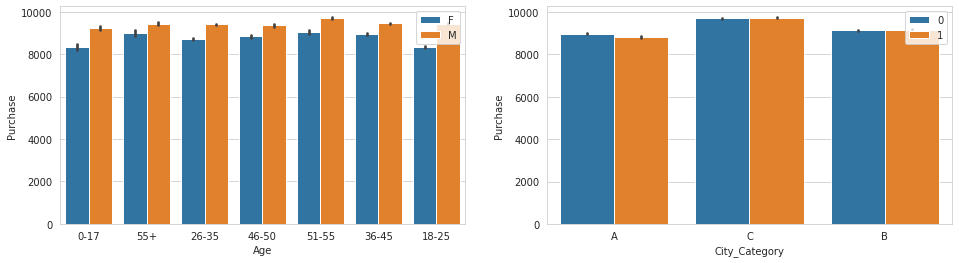

In [128]:
# For visual understanding---> ploting the purchase with age, gender, city category.

plt.figure(figsize=(16,4))
sns.set_style(style='whitegrid')
plt.subplot(1,2,1)
sns.barplot(x=df['Age'],y=df['Purchase'],hue=df['Gender'])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
sns.barplot(x=df['City_Category'],y=df['Purchase'],hue=df['Marital_Status'])
plt.legend(loc='upper right')


In [129]:
# Identifying covariation between variables

df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,0.001566,0.000246,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.001566,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,0.000246,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.020833,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


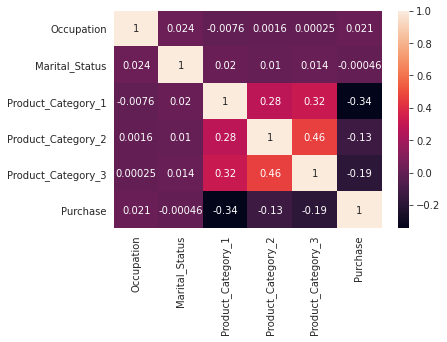

In [130]:
# Ploting covariation between variables

sns.heatmap(df.corr(),annot=True)

In [131]:
# To find value counts in categorical feature function is created.

def unique_val(df,feature):
  print(df[feature].value_counts())
  

In [132]:
print(unique_val(df,'Gender'),'---------------------------------------------','\n'),
print(unique_val(df,'Age'),'---------------------------------------------','\n'),
print(unique_val(df,'City_Category'),'---------------------------------------------','\n')
print(unique_val(df,'Stay_In_Current_City_Years'),'---------------------------------------------','\n')
print(unique_val(df,'Product_ID'))

M    414259
F    135809
Name: Gender, dtype: int64
None --------------------------------------------- 

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
None --------------------------------------------- 

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
None --------------------------------------------- 

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
None --------------------------------------------- 

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00077342       1
P00081342       1
P00104342       1
P00312542       1
P00068342       1
Name: Product_ID, Length: 3631, dtype: int64
None


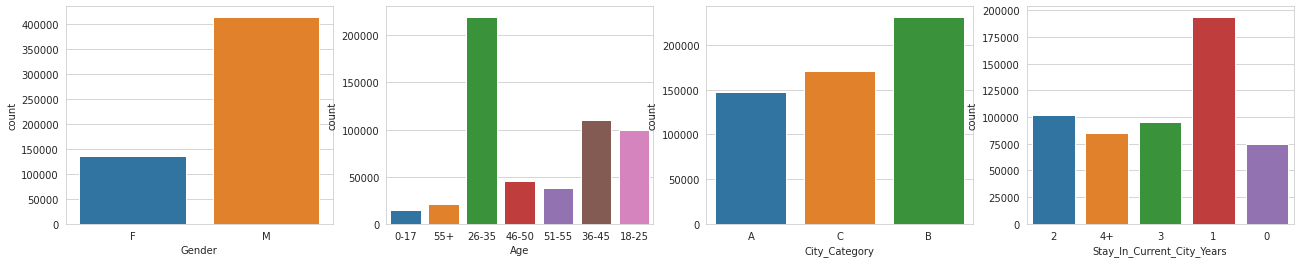

In [133]:
# Visually finding the count of categorical values.

df_cat=df[['Gender','Age','City_Category','Stay_In_Current_City_Years']]
cat_count= list(df_cat.columns)
plt.figure(figsize=(22,4))
for i in enumerate(cat_count):
  plt.subplot(1,4,i[0]+1)
  sns.countplot(x=i[1],data=df_cat)

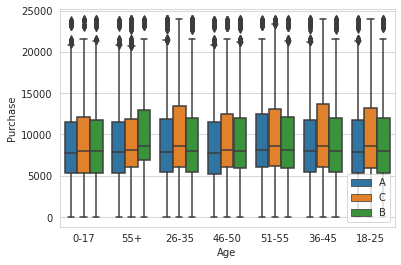

In [134]:
# Visually checking boxplot with age, purchase and city

sns.boxplot(x='Age',y='Purchase',hue='City_Category',data=df)
plt.legend(loc='lower right')

In [135]:
# Importing label encoding

from sklearn.preprocessing import LabelEncoder

In [136]:
# Creating a function to label encode for categorical feature.  

label=LabelEncoder()
def encoder(df,variable):
  df[variable]=label.fit_transform(df[variable])

In [137]:
# Implementing the function 

encoder(df,'Product_ID')
encoder(df,'Gender')
encoder(df,'Age')
encoder(df,'City_Category')
encoder(df,'Stay_In_Current_City_Years')

In [138]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,2734,1,6,16,2,4,0,8,8.0,16.0,7969


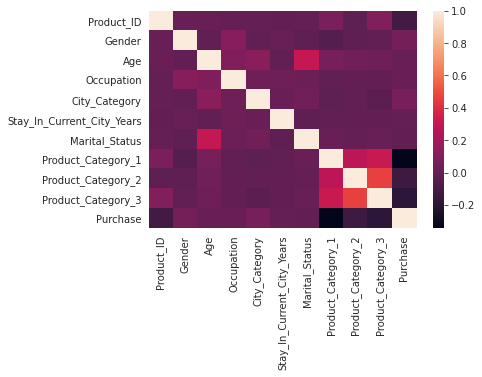

In [139]:
sns.heatmap(df.corr())

In [140]:
# Object dtype has been changed to int

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


In [141]:
# Product ID is also important...so instead of droping label encoding is done on it.

df.Product_ID.unique()  

array([ 672, 2376,  852, ..., 3560, 3566, 3565])

In [142]:
# For ploting the feature in df, variable is created.

feature=list(df.columns)
feature

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

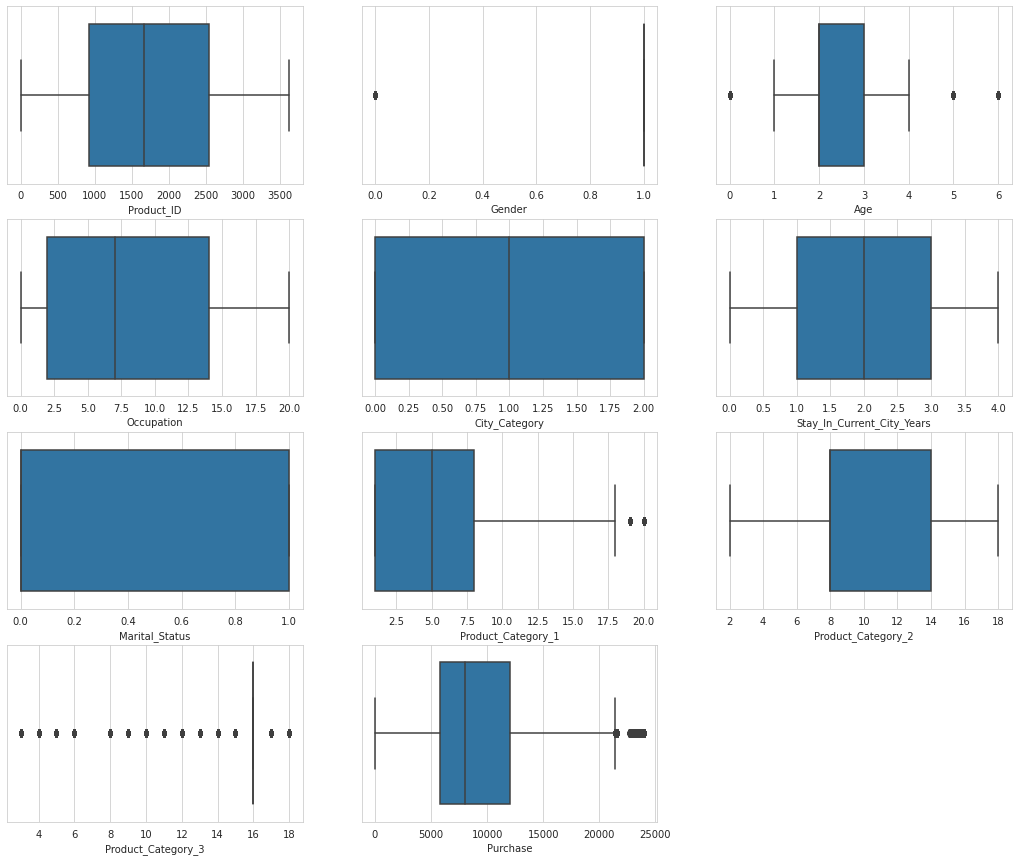

In [143]:
# For finding outliers boxplot is used on feature variable 

plt.figure(figsize=(18,15))
for i in enumerate(feature):
  plt.subplot(4,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

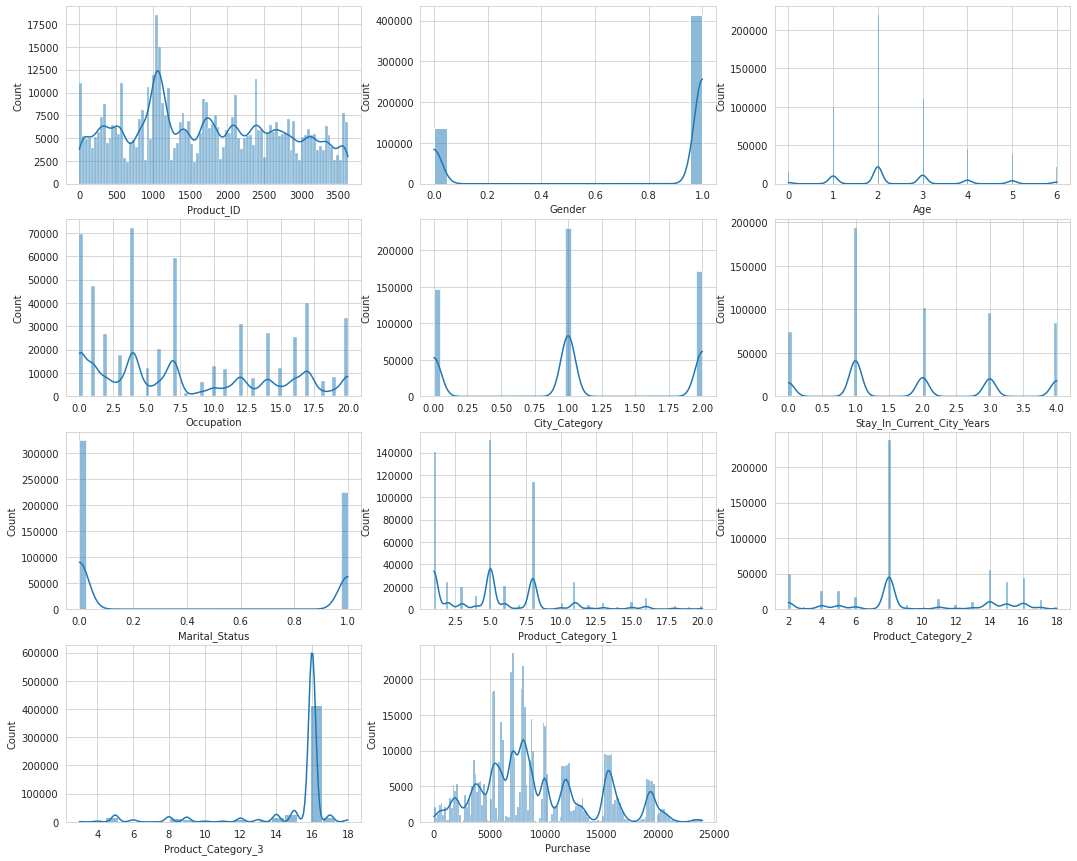

In [144]:
# For finding the distribution of data histplot is used.

plt.figure(figsize=(18,15))
for i in enumerate(feature):
  plt.subplot(4,3,i[0]+1)
  sns.histplot(df[i[1]],kde=True)

# Linear Regression

In [219]:
import statsmodels.api as sm

In [220]:
X=df.drop(['Purchase'],axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,672,0,0,10,0,2,0,3,8.0,16.0
1,2376,0,0,10,0,2,0,1,6.0,14.0
2,852,0,0,10,0,2,0,12,8.0,16.0
3,828,0,0,10,0,2,0,12,14.0,16.0
4,2734,1,6,16,2,4,0,8,8.0,16.0


In [221]:
y=df['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [222]:
x=sm.add_constant(X)

In [223]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     8760.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:14:45   Log-Likelihood:            -5.4274e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550057   BIC:                         1.086e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.312e+04     41.100    319.105      0.000     1.3e+04    1.32e+04
Product_ID                    -0.4016      0.006    -64.026      0.000      -0.414      -0.389
Gender                       538.0033     14.710     36.573      0.000     509.171     566.835
Age                          127.3380      4.954     25.704      0.000     117.628     137.048
Occupation                     6.7773      0.976      6.944      0.000       4.864       8.690
City_Category                344.3878      8.347     41.261      0.000     328.029     360.747
Stay_In_Current_City_Years     7.9334      4.882      1.625      0.104      -1.636      17.503
Marital_Status               -47.3184     13.464     -3.514      0.000     -73.708     -20.929
Product_Category_1          -396.0585      1.714   -231.129      0.000    -399.417    -392.700
Product_Category_2           -10.7235      1.679     -6.387      0.000     -14.014      -7.433
Product_Category_3          -137.3094      2.672    -51.397      0.000    -142.546    -132.073
==============================================================================
Omnibus:                    59045.120   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82130.165
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       3.804   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

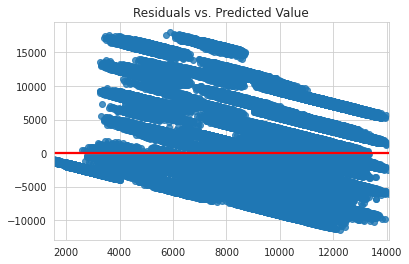

In [224]:
fitted_vals=model.predict()
resids=model.resid

sns.regplot(x=fitted_vals, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

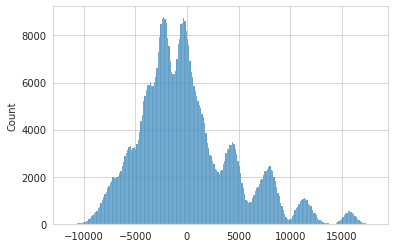

In [225]:
sns.histplot(model.resid)

In [226]:
from scipy import stats

((array([-4.70648688, -4.52228984, -4.42257089, ...,  4.42257089,
          4.52228984,  4.70648688]),
  array([-11456.35636001, -11369.32652528, -11288.82796116, ...,
          17686.92797376,  17789.97362864,  18012.72079958])),
 (4557.416320181504, 7.210292725703737e-11, 0.976870102730424))

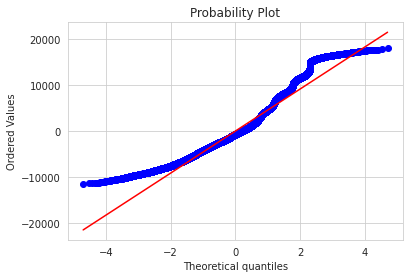

In [227]:
stats.probplot(resids, plot=sns.mpl.pyplot)

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [230]:
xtrain.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
500304,1993,1,2,16,0,0,0,8,14.0,16.0
16861,2520,1,2,1,1,2,1,16,8.0,16.0
113230,599,1,1,7,0,1,0,8,16.0,16.0
434978,1180,1,2,0,0,1,0,1,16.0,16.0
385516,564,0,3,3,2,3,1,3,4.0,5.0


In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
reg.coef_

array([-4.01150459e-01,  5.29161701e+02,  1.23474853e+02,  6.60137775e+00,
        3.43038905e+02,  7.71766917e+00, -5.50040484e+01, -3.98968615e+02,
       -9.29342068e+00, -1.36593133e+02])

In [234]:
reg.intercept_

13127.238223172873

In [235]:
ypred=reg.predict(xtest)

In [236]:
from sklearn.metrics import r2_score

In [237]:
r2_score(ytest,ypred)*100

13.545397767012357

In [238]:
a=pd.DataFrame({'ac':ytest,'pr':ypred})
a.head(10)

,ac,pr
84432,19142,11152.706242
72724,15513,10289.370962
197032,7802,7511.821564
353704,15455,11040.586861
91198,4492,9487.245843
263977,6965,9304.614408
340456,8763,9429.649120
24094,19347,10111.093007
157277,7017,9722.401003
531759,15594,10891.406958


# Polynomial Regression

In [239]:
from sklearn.preprocessing import PolynomialFeatures

In [240]:
poly_reg=PolynomialFeatures(degree=2)

In [241]:
xtrain_poly=poly_reg.fit_transform(xtrain)

In [242]:
xtest_poly=poly_reg.fit_transform(xtest)

In [243]:
reg_2=LinearRegression()
reg_2.fit(xtrain_poly,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
reg_2.intercept_

14968.800005779081

In [245]:
reg_2.coef_

array([-8.65826666e-11,  9.10358667e-01, -1.44684167e+02,  2.51726956e+02,
        4.17898601e+01, -5.67169754e+01, -2.17171737e+01, -2.59382407e+01,
       -2.59337227e+03,  2.27282144e+02, -1.69900133e+02, -1.51357505e-04,
       -9.45897937e-02, -4.25329829e-03, -1.75340991e-03, -1.41614740e-01,
       -2.68276122e-03,  4.74236641e-03, -1.18360969e-01,  3.58471774e-02,
       -2.21452148e-02, -1.44684167e+02, -1.01717652e+02,  9.83841117e+00,
        1.73150351e+02,  1.29395888e+01, -7.73654124e+01, -4.16943572e+01,
        2.89875744e+01,  4.27530329e+01, -1.63774528e+01,  2.45440201e+00,
        1.29984470e+01,  1.45061564e+01, -2.23681025e+01, -5.62626064e+00,
       -1.07821743e+01,  9.26720746e+00, -2.22289712e+00, -2.80081029e+00,
       -1.75092782e+00,  1.15403908e+01,  2.34741690e-01,  2.65196610e-02,
       -5.12729937e-01,  1.56564115e+02,  1.91374667e+01,  1.00651120e+02,
       -6.57968061e+01,  5.63739864e+00,  2.30860067e+01,  6.50033207e+00,
       -2.76994621e+01, -

In [246]:
ypred_poly=reg_2.predict(xtest_poly)

In [247]:
r2_score(ytest,ypred_poly) * 100

24.16496985970349

# Decision Tree Regression

In [253]:
from sklearn.tree import DecisionTreeRegressor

In [254]:
reg_4=DecisionTreeRegressor(random_state=0)

In [255]:
reg_4.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [256]:
ypred_dt=reg_4.predict(xtest)

In [257]:
reg_4.score(xtrain,ytrain) * 100

97.03071361029218

# Random Forest Regression

In [258]:
from sklearn.ensemble import RandomForestRegressor

In [259]:
reg_5=RandomForestRegressor(n_estimators=100,random_state=0)

In [260]:
reg_5.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [261]:
reg_5.score(xtrain,ytrain)

0.9343600052117065

In [262]:
ypred_rf=reg_5.predict(xtest)

In [263]:
pd.DataFrame(ypred_rf,ytest).head(10)

,0
Purchase,
19142,13359.330000
15513,12956.878333
7802,6326.470000
15455,12599.513000
4492,15935.510000
6965,6696.730000
8763,5974.354000
19347,16261.014500
7017,6618.317500


# Test Data

In [264]:
df_test=pd.read_csv('/content/test.csv')

In [265]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [266]:
df_test.shape

(233599, 11)

In [267]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [268]:
df_test.dropna(inplace=True,axis=0)
df_test.drop(labels='User_ID',axis=1,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [269]:
df_test.shape

(71037, 10)

In [270]:
encoder(df_test,'Product_ID')
encoder(df_test,'Gender')
encoder(df_test,'Age')
encoder(df_test,'City_Category')
encoder(df_test,'Stay_In_Current_City_Years')

In [271]:
df_test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,81,0,2,1,2,1,0,4,5.0,12.0
1,483,1,4,1,2,3,1,2,3.0,15.0
2,234,1,4,1,2,3,1,1,11.0,15.0
3,506,1,4,1,2,3,1,2,4.0,9.0
4,247,1,2,7,0,1,0,10,13.0,16.0


In [272]:
# From the above regression model decision tree gives good score

test_pred=reg_4.predict(df_test)